# Risk Analysis for a New Product Launch
The management of Madeira Computing is considering the introduction of a wearable electronic device with the functionality of a phone. The fixed cost to launch this new product is 300,000.  The variable cost for the product is expected to be between 160 and 240, with a most likely value (mode) of 200 per unit. The product will sell for 300 per unit. Demand for the product is expected to range from 0 to approximately 20,000 units, with 4,000 units being the most likely (i.e. the mode).

In [1]:
from scipy.stats import gamma
import statistics
import random
import numpy as np

print("Starting projected profit simulation:")
#Variables:
sell_price=300
fixed_cost=300_000
estimations=1000

#Storing for calculations:
profitList=[]
loss_count=0
profit_count=0

variableList=list(range(160, 241))
shape, scale = 2, 3  
unitList = list(np.random.gamma(2, 3, 1000)*1000)

for num in range(estimations+1):
    rand_variable_cost=random.choice(variableList)
    rand_units=random.choice(unitList)
    margin_cost=sell_price-rand_variable_cost
    margin_money=margin_cost*rand_units
    profit=margin_money-fixed_cost
    profitList.append(profit)
    
    if profit>0:
        profit_count+=1
    else:
        loss_count+=1
        
print(round(profit_count/len(profitList),2), " profit chance")
print(round(loss_count/len(profitList),2), " loss chance")
print("$", round(statistics.mean(profitList), 2))
print("Calculations Done.")

Starting projected profit simulation:
0.72  profit chance
0.28  loss chance
$ 320300.92
Calculations Done.


### Gamma Distribution Graph
Demand Distribution: Assume that the product demand can be well-approximated as 1,000 times the value of a gamma random variable with an alpha parameter of 3 and a beta parameter of 2. This is unitList that is randomly generated and then graphed. 

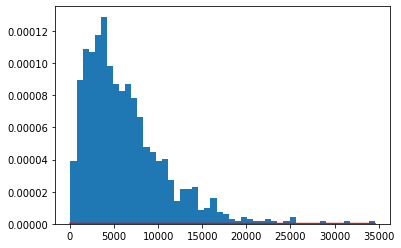

In [2]:
import matplotlib.pyplot as plt
import scipy.special as sps  
def plotGamma():
    count, bins, ignored = plt.hist(unitList, 50, density=True)
    y = bins**(shape-1)*(np.exp(-bins/scale) /  
                         (sps.gamma(shape)*scale**shape))
    plt.plot(bins, y, linewidth=2, color='r')
    plt.show()
plotGamma()